# Praca domowa 1
Mikołaj Roguski

Zadanie polega na eksploracyjnej analizie danych oraz ich preprocessingu ze zbioru : [prediction on hospital admission](https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008)

## import danych i bibliotek

In [308]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


In [309]:
df = pd.read_csv("diabetic_data.csv")
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Zmienną objaśnianą będzie `readmitted` do jej objaśnienia możemy wykorzystać wszystkie zmienne oprócz `encounter_id`, `patient_nbr`, `payer_code` oraz `medical_specialty`,`admission_source`,  ponieważ albo nie mają one związku z chorobą pacjenta, lub go identyfikują. Braki danych zapisane są w danych jako "?" lub "None"

## eda

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

<ipython-input-311-70d1e954a912>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[df.columns[df.dtypes == 'int64']].hist(ax = ax)


array([[<AxesSubplot:title={'center':'encounter_id'}>,
        <AxesSubplot:title={'center':'patient_nbr'}>,
        <AxesSubplot:title={'center':'admission_type_id'}>,
        <AxesSubplot:title={'center':'discharge_disposition_id'}>],
       [<AxesSubplot:title={'center':'admission_source_id'}>,
        <AxesSubplot:title={'center':'time_in_hospital'}>,
        <AxesSubplot:title={'center':'num_lab_procedures'}>,
        <AxesSubplot:title={'center':'num_procedures'}>],
       [<AxesSubplot:title={'center':'num_medications'}>,
        <AxesSubplot:title={'center':'number_outpatient'}>,
        <AxesSubplot:title={'center':'number_emergency'}>,
        <AxesSubplot:title={'center':'number_inpatient'}>],
       [<AxesSubplot:title={'center':'number_diagnoses'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

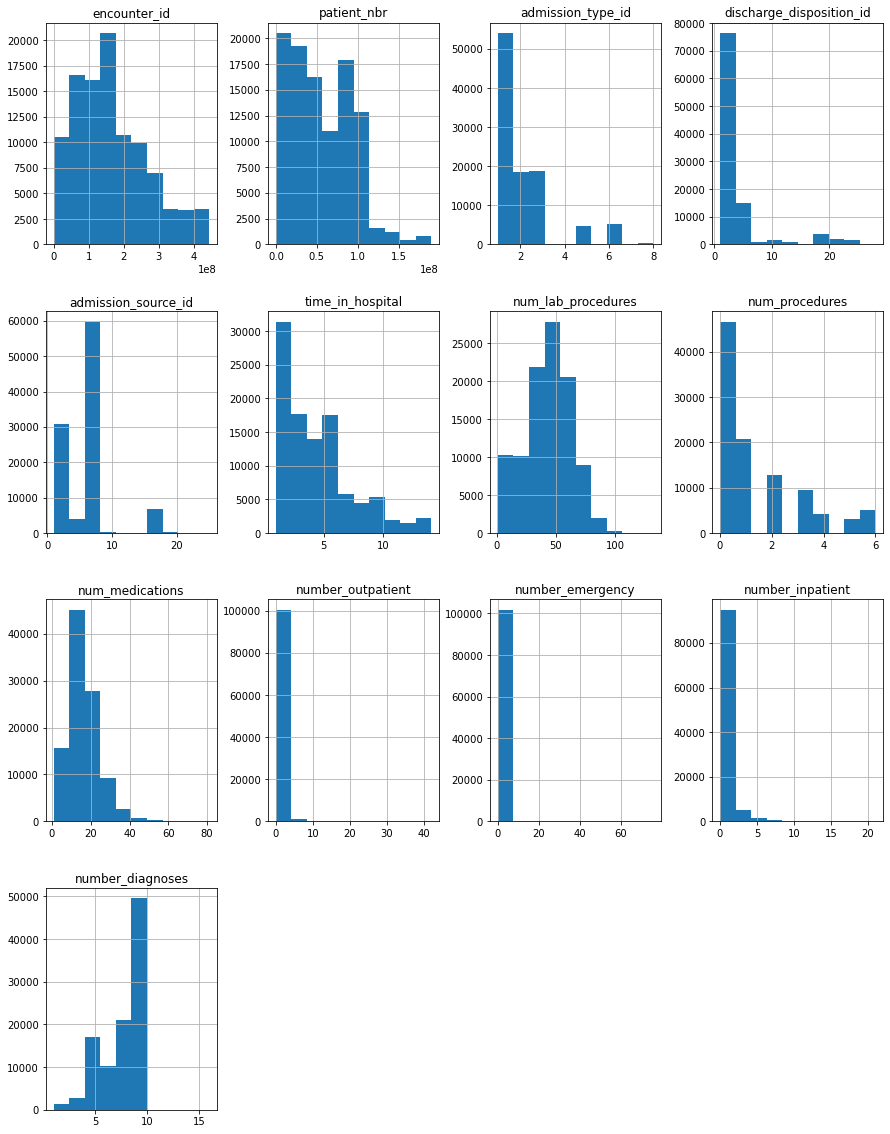

In [311]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df[df.columns[df.dtypes == 'int64']].hist(ax = ax)

<AxesSubplot:xlabel='index', ylabel='counts'>

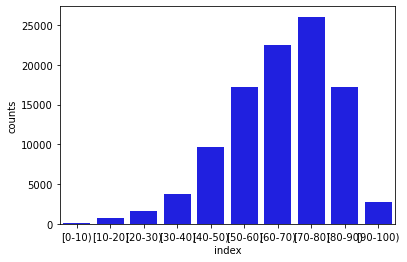

In [312]:
sns.barplot(x = 'index', y ='counts', data = df.age.value_counts().reset_index(name = 'counts'), order = ['[0-10)','[10-20)','[20-30)','[30-40)','[40-50)','[50-60)','[60-70)','[70-80)','[80-90)','[90-100)'], color= 'blue')

In [313]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [314]:
df.corr()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
encounter_id,1.000000,0.512028,-0.158961,-0.132876,-0.112402,-0.062221,-0.026062,-0.014225,0.076113,0.103756,0.082803,0.030962,0.265149
patient_nbr,0.512028,1.000000,-0.011128,-0.136814,-0.032568,-0.024092,0.015946,-0.015570,0.020665,0.103379,0.062352,0.012480,0.226847
admission_type_id,-0.158961,-0.011128,1.000000,0.083483,0.106654,-0.012500,-0.143713,0.129888,0.079535,0.026511,-0.019116,-0.038161,-0.117126
discharge_disposition_id,-0.132876,-0.136814,0.083483,1.000000,0.018193,0.162748,0.023415,0.015921,0.108753,-0.008715,-0.024471,0.020787,0.046891
admission_source_id,-0.112402,-0.032568,0.106654,0.018193,1.000000,-0.006965,0.048885,-0.135400,-0.054533,0.027244,0.059892,0.036314,0.072114
time_in_hospital,-0.062221,-0.024092,-0.012500,0.162748,-0.006965,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186
num_lab_procedures,-0.026062,0.015946,-0.143713,0.023415,0.048885,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,0.152773
num_procedures,-0.014225,-0.015570,0.129888,0.015921,-0.135400,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236,0.073734
num_medications,0.076113,0.020665,0.079535,0.108753,-0.054533,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194,0.261526
number_outpatient,0.103756,0.103379,0.026511,-0.008715,0.027244,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338,0.094152


### zmienne o zerowej i blisko zerowej wariancji

In [315]:
a = lambda x: x.str.count("No").sum()
df.loc[:,'metformin':'metformin-pioglitazone'].apply(a).sort_values()

insulin                      47383
metformin                    81778
glipizide                    89080
glyburide                    91116
pioglitazone                 94438
rosiglitazone                95401
glimepiride                  96575
repaglinide                 100227
glyburide-metformin         101060
nateglinide                 101063
acarbose                    101458
chlorpropamide              101680
tolazamide                  101727
miglitol                    101728
tolbutamide                 101743
glipizide-metformin         101753
troglitazone                101763
metformin-rosiglitazone     101764
acetohexamide               101765
glimepiride-pioglitazone    101765
metformin-pioglitazone      101765
examide                     101766
citoglipton                 101766
dtype: int64

usunę zmienne gdzie mniej niż 0.1% rekordów jest różnych od "NO"

In [316]:
df.drop(['chlorpropamide','acetohexamide','tolbutamide','miglitol','troglitazone','tolazamide','examide','citoglipton','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone'],axis = 1, inplace = True)

## braki danych


In [317]:
# dla zmiennych object o brakach zaznaczonych ?
a = lambda x : x.str.count("\?").sum()
df[df.columns[df.dtypes == 'object']].apply(a).sort_values()


repaglinide                0
change                     0
glyburide-metformin        0
insulin                    0
acarbose                   0
rosiglitazone              0
pioglitazone               0
glyburide                  0
glipizide                  0
glimepiride                0
nateglinide                0
diabetesMed                0
readmitted                 0
A1Cresult                  0
max_glu_serum              0
age                        0
gender                     0
metformin                  0
diag_1                    21
diag_2                   358
diag_3                  1423
race                    2273
payer_code             40256
medical_specialty      49949
weight                 98569
dtype: int64

In [318]:
# dla zmiennych int64
df[df.columns[df.dtypes == 'int64']].isna().sum()

encounter_id                0
patient_nbr                 0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
dtype: int64

    widzimy, że w przypadku `weight` brakuje aż niecałych 97% danych! natomiast w przypadku `payer_code` i `medical_specialty` brakuje około 40%. Usunę te kolumny. W przypadku `diag_123` ponieważ brak danych o diagnozie = brak diagnozy utworzymy nową klasę dla tych kolumn '-1'. kilumny `payer_code` oraz `medical_specialty` nie powinny wnosić za wiele do modelu, oraz brakuje ich około 50% obserwacji, dlatego usunę te kolumny. w przypadku zmiennej `race` brakuje ok 0,2% zmiennych, które nie powinny zawierać specjalncch przypadków, dlatego usunę te wiersze. Usunę też zmienną `weight`.

In [319]:
df.drop(['weight','payer_code','medical_specialty','encounter_id'],axis = 1, inplace = True)
df.loc[:,['diag_1','diag_2','diag_3']] = df.loc[:,['diag_1','diag_2','diag_3']].apply(lambda x : x.replace('?',-1))
df = df.loc[df.race != "?",]

In [320]:
df.admission_type_id.value_counts()

1    52900
3    18508
2    17786
6     5225
5     4727
8      317
7       20
4       10
Name: admission_type_id, dtype: int64

In [321]:
df.discharge_disposition_id.value_counts()

1     58768
3     13614
6     12698
18     3673
2      2061
22     1981
11     1608
5      1143
25      973
4       765
7       611
23      406
13      397
14      369
28      138
8       107
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [322]:
df.admission_source_id.value_counts()

7     56632
1     28855
17     6698
4      2986
6      1989
2      1042
5       848
3       187
20      160
9        54
8        16
22       12
10        7
11        2
14        2
25        2
13        1
Name: admission_source_id, dtype: int64

In [323]:
df.gender.value_counts()

Female             53575
Male               45917
Unknown/Invalid        1
Name: gender, dtype: int64

kolejno 6 18 i 17 oznaczają 'NULL' wg `IDs_mapping` stanowią nie wielką część wszystkich recordów, dlatego mogą zostać jak są. Problemem jest natomiast 8 w `admission_type_id`, 25 w `discharge_disposition_id` oraz 20 w `admission_source_id` które nie są zmapowane, jednak pojawiają się w zbiorach danych. Ponieważ najprawdopodobniej wynika to z błędu a ich liczba jest znikoma usunę te recordy. podobnie z `gender` ponieważ brakuje tylko jednej płci usunę ten rekord.

In [324]:
df = df.loc[(df.admission_type_id != 8) & (df.discharge_disposition_id != 25) & (df.admission_source_id != 20) & (df.gender != "Unknown/Invalid"),]

In [325]:
df['max_glu_serum'].value_counts()

None    93105
Norm     2406
>200     1346
>300     1187
Name: max_glu_serum, dtype: int64

In [326]:
df['A1Cresult'].value_counts()

None    81683
>8       7818
Norm     4861
>7       3682
Name: A1Cresult, dtype: int64

'none' oznacza tutaj, że nie wykonano testu brakuje więc 93% i 82% obesrwacji usuwam te kolumny

In [327]:
df.drop(['A1Cresult','max_glu_serum'],axis = 1, inplace = True)

## encoding zmiennyc

In [328]:
encoder = OneHotEncoder()
df.race.value_counts()
df.reset_index(inplace = True)


W przypadku zmiennych kategorycznych małe klasy połącze tak, aby każda stanowiła co najmniej 5% rekordów. wiek zamienię średnią przedziału, do którego należy

In [329]:
df.race.replace(to_replace  = ['Hispanic','Asian','Other'], value =  'Other', inplace  = True)
print(df.race.value_counts())
edf = pd.DataFrame(encoder.fit_transform(df[['race']]).toarray(), columns = ['Race_Afroamerican','Race_Caucasian','Race_Other'])
df = df.join(edf)

Caucasian          74928
AfricanAmerican    18968
Other               4148
Name: race, dtype: int64


In [330]:
df['age'] = df['age'].map({'[0-10)':5,'[10-20)':15,'[20-30)':25, '[30-40)':35, '[40-50)':45, '[50-60)':55, '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95})
df['age']


0        15
1        25
2        35
3        45
4        55
         ..
98039    75
98040    85
98041    75
98042    85
98043    75
Name: age, Length: 98044, dtype: int64

In [331]:
df['admission_type_id']= df['admission_type_id'].map({1:'Admission_Emergency',2:'Admisison_Urgent',3:'Admission_Elective',4:'Admission_Other',5:'Admission_Other',6:'Admission_Other',7:'Admission_Other',8:'Admission_Other'}) # pozbywam się rzadkich


In [332]:
edf = pd.DataFrame(encoder.fit_transform(df[['admission_type_id']]).toarray(),columns = ['Admission_Emergency','Admission_Urgent','Admission_Elective','Admission_Other'])
df = df.join(edf)

In [333]:
edf = pd.DataFrame(encoder.fit_transform(df[['gender']]).toarray(),columns = ['female','male'])
df = df.join(edf)

In [334]:
df.drop(['race','gender','admission_type_id'], axis = 1, inplace = True)

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98044 entries, 0 to 98043
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     98044 non-null  int64  
 1   patient_nbr               98044 non-null  int64  
 2   age                       98044 non-null  int64  
 3   discharge_disposition_id  98044 non-null  int64  
 4   admission_source_id       98044 non-null  int64  
 5   time_in_hospital          98044 non-null  int64  
 6   num_lab_procedures        98044 non-null  int64  
 7   num_procedures            98044 non-null  int64  
 8   num_medications           98044 non-null  int64  
 9   number_outpatient         98044 non-null  int64  
 10  number_emergency          98044 non-null  int64  
 11  number_inpatient          98044 non-null  int64  
 12  diag_1                    98044 non-null  object 
 13  diag_2                    98044 non-null  object 
 14  diag_3

In [336]:
edf = pd.DataFrame(encoder.fit_transform(df.loc[:,'metformin':'glyburide-metformin']).toarray())
df = df.join(edf)


In [337]:
df.discharge_disposition_id.value_counts()
from collections import defaultdict
d = defaultdict(lambda : 'other')
d[1] = 'discharged to home'
d[3] = 'transferred to snf'
d[6] = 'Discharged/transferred to home with home health service'
df['discharge_disposition_id'] = df['discharge_disposition_id'].map(d)
edf = pd.DataFrame(encoder.fit_transform(df[['discharge_disposition_id']]).toarray(),columns=['discharge_home','discharge_snf','discharge_hs','discharge_other'])
df = df.join(edf)

In [338]:
df.drop(df.loc[:,'metformin':'glyburide-metformin'].columns,axis = 1, inplace = True)
df.drop(['patient_nbr','discharge_disposition_id'],axis = 1, inplace = True)

In [339]:
df.admission_source_id.value_counts()
d = defaultdict(lambda : 'other')
d[7] = 'er'
d[1] = 'physician_referral'
df['admission_source_id'] = df['admission_source_id'].map(d)
edf = pd.DataFrame(encoder.fit_transform(df[['admission_source_id']]).toarray(),columns=['admission_source_er','admission_source_physician','admission_source_other'])
df = df.join(edf)

In [340]:
df.drop('admission_source_id',axis = 1, inplace = True)

In [341]:
df['change'] = df['change'].map({'Ch':1,'No':0})
df['change'].value_counts()

0    52776
1    45268
Name: change, dtype: int64

In [342]:
df['diabetesMed'] = df['diabetesMed'].map({'Yes':1, 'No':0})
df['diabetesMed'].value_counts()

1    75329
0    22715
Name: diabetesMed, dtype: int64

In [343]:
def fix(x):
    try:
        return int(x)
    except:
        return -1

In [344]:
df[['diag_1','diag_2','diag_3']] = df[['diag_1','diag_2','diag_3']].applymap(fix)

In [345]:
df['diag_1'] = pd.cut(df['diag_1'],bins= [-2,0,139,239,279,289,319,389,459,519,579,629,679,709,739,759,779,799,1000])
df['diag_2'] = pd.cut(df['diag_2'],bins= [-2,0,139,239,279,289,319,389,459,519,579,629,679,709,739,759,779,799,1000])
df['diag_3'] = pd.cut(df['diag_3'],bins= [-2,0,139,239,279,289,319,389,459,519,579,629,679,709,739,759,779,799,1000])
d = defaultdict(lambda : 'other')
d[pd.Interval(389,459)] = 'circulatory'
d[pd.Interval(459,519)] = 'endocrine'
d[pd.Interval(519,579)] = 'respiratory'
d[pd.Interval(579, 629)] = 'genitourinary'
df['diag_1'] = df['diag_1'].map(d)
df['diag_2'] = df['diag_2'].map(d)
df['diag_3'] = df['diag_3'].map(d)

In [346]:
df['diag_other'] = 1*((df['diag_1']=='other') | (df['diag_2'] == 'other') | (df['diag_3'] == 'other'))+0
df['diag_circulatory'] = 1*((df['diag_1']=='circulatory') | (df['diag_2'] == 'circulatory') | (df['diag_3'] == 'circulatory'))+0
df['diag_endocrine'] = 1*((df['diag_1']=='endocrine') | (df['diag_2'] == 'endocrine') | (df['diag_3'] == 'endocrine'))+0
df['diag_respiratory'] = 1*((df['diag_1']=='respiratory') | (df['diag_2'] == 'respiratory') | (df['diag_3'] == 'respiratory'))+0
df['diag_genitourinary'] = 1*((df['diag_1']=='genitourinary') | (df['diag_2'] == 'genitourinary') | (df['diag_3'] == 'genitourinary'))+0


In [347]:
df.drop(['diag_1','diag_2','diag_3'],axis = 1, inplace = True)

In [348]:
d = defaultdict(lambda :numpy.array([0,0,1]))
d[">30"] = numpy.array([1,0,0])
d["<30"] = numpy.array([1,1,0])
df['readmitted'] = df['readmitted'].map(d)

In [349]:
df.drop('index',axis = 1, inplace = True)

## wynikowa ramka

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98044 entries, 0 to 98043
Data columns (total 77 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         98044 non-null  int64  
 1   time_in_hospital            98044 non-null  int64  
 2   num_lab_procedures          98044 non-null  int64  
 3   num_procedures              98044 non-null  int64  
 4   num_medications             98044 non-null  int64  
 5   number_outpatient           98044 non-null  int64  
 6   number_emergency            98044 non-null  int64  
 7   number_inpatient            98044 non-null  int64  
 8   number_diagnoses            98044 non-null  int64  
 9   change                      98044 non-null  int64  
 10  diabetesMed                 98044 non-null  int64  
 11  readmitted                  98044 non-null  object 
 12  Race_Afroamerican           98044 non-null  float64
 13  Race_Caucasian              980